## hw11
模拟生成几何布朗运动、扩散跳跃、平方跟扩散的随机过程

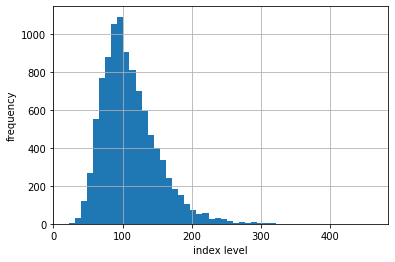

In [4]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as scs

##几何布朗运动
I = 10000
M = 50
sigma = 0.25 
S0 = 100
T = 2.0
r = 0.05
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * npr.standard_normal(I))
    
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

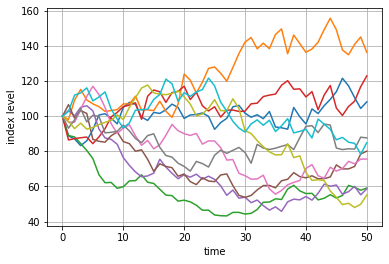

In [5]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.show()

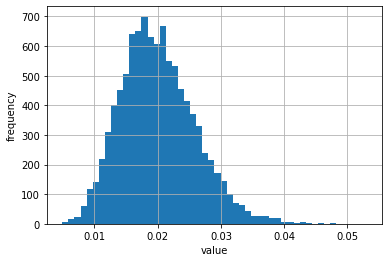

In [6]:
##平方扩散
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

I = 10000
M = 50
dt = T / M
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
              + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
              + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)  
              * npr.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1
x1 = srd_euler()

plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

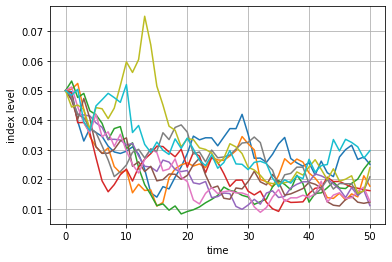

In [7]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.show()

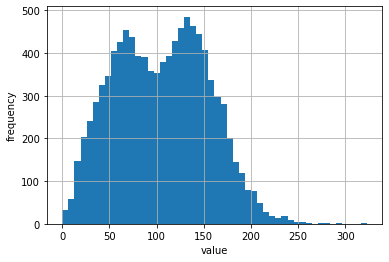

In [8]:
##跳跃扩散
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0

M = 50
I = 10000
dt = T / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)
    
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)  
plt.show()  

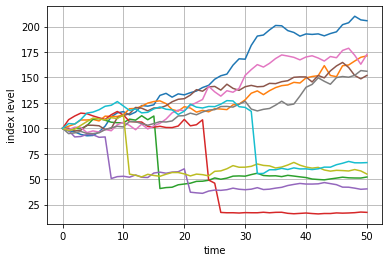

In [9]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.show()